# Demonstration Machine Learning in Python

The [Titanic data set from Kaggle](https://www.kaggle.com/c/titanic) is used in this project.

We try to classify the passengers of the Titanic by their "survival" or "deceased" status.

The data set is not entirely clean, so some data cleansing skills are needed as well.

# importing the  standard libraries used in this project

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Datavisualization

Lets start by visualising the data.

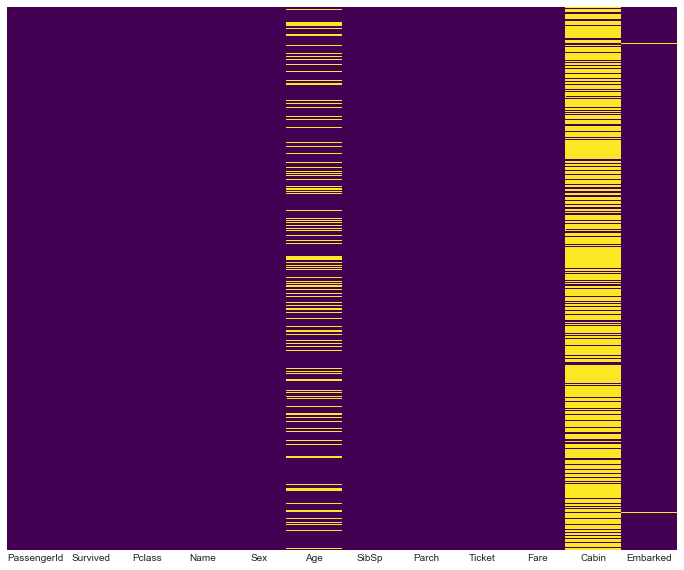

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In the plot above we can see which columns of the dataset contain null values and roughly how much of every column is actually empty.
The column 'Cabin' is empty most of the time, therfore this column will be removed later on in this project.

But how should the column 'Age' should be handled. To determine an approach for this a deeper visulaization of the data set might be useful.

Next up a boxplot describes how many passengers survived and how many not.

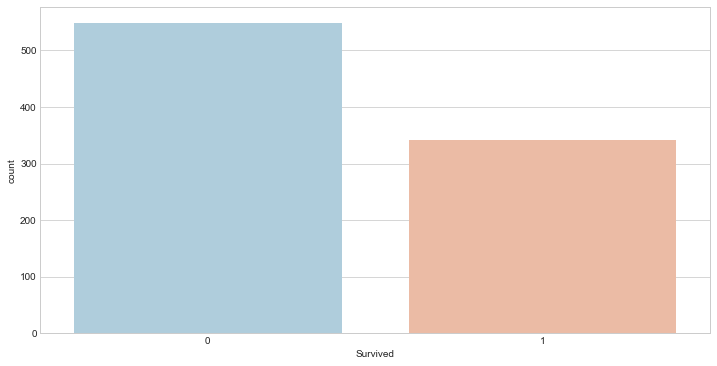

In [37]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train,palette='RdBu_r')

Now this distribution between survived and deceased passengers will be visualized relative to the sex of the passengers.

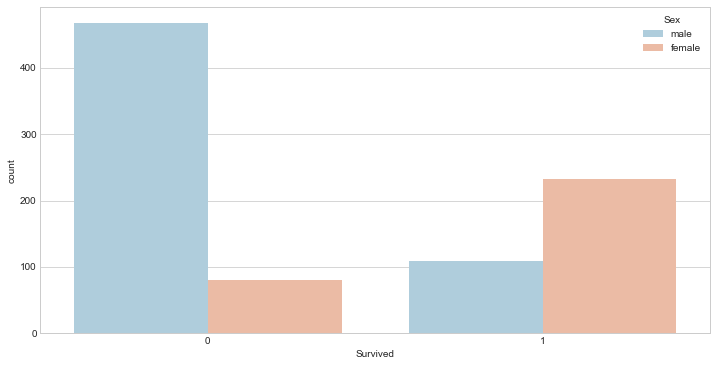

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

As we can see roughly twice as many female passengers survived as male passengers did.

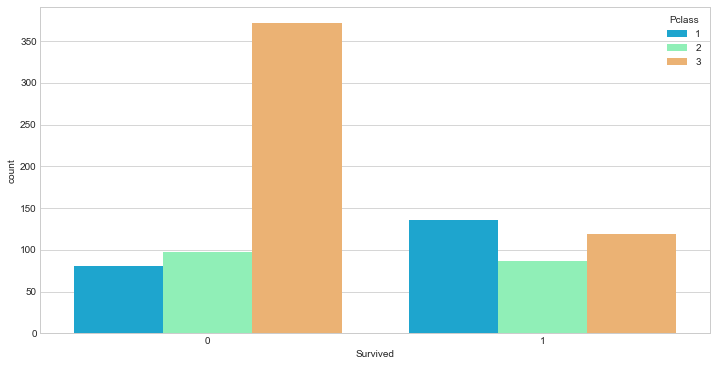

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

Just for good meassure add a histogram of the passenger age.

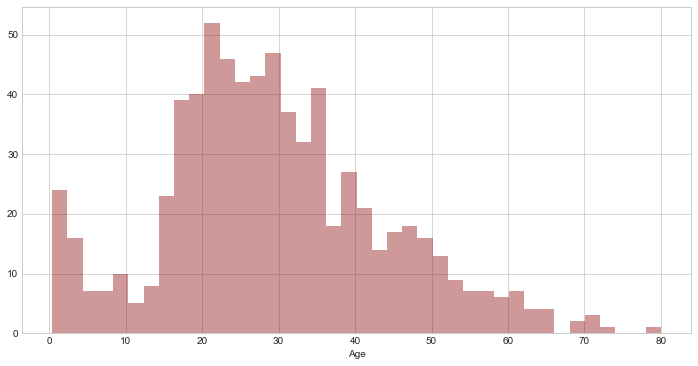

In [40]:
plt.figure(figsize=(12, 6))
sns.distplot(df_train['Age'].dropna(),kde=False,color='darkred',bins=40)

# Data Wrangling

As we have seen in the first plot of this section, we have to deal with at least three columns that contain null values. Those columns are 'Age', 'Cabin', and 'Embarked'.
Next up we will fill the 'Age' column. A simple solutions would be to fill the null values with the average age.

Usually first class passengers tend to be a little older, because it takes time to make the required amount of money.
In order to proof this hypothesis we create a boxplot with 'Age' and 'Pclass' 

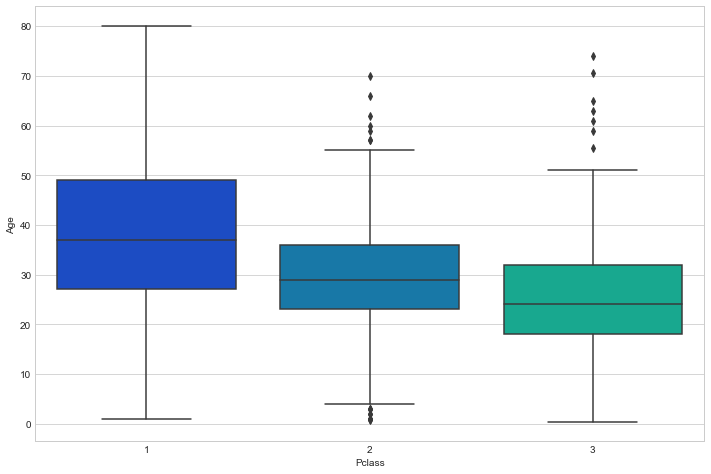

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

The previously mentioned hypthesis seems to be correct. This means that we use the average age for each passenger class to fill the missing values for the 'Age' column. Now lets get the exact values.

In [42]:
no_na_age = df_train[pd.notnull(df_train['Age'])]
no_na_age.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,463.962366,0.655914,38.233441,0.451613,0.408602,87.961582
2,447.156069,0.479769,29.877630,0.427746,0.404624,21.471556
3,441.219718,0.239437,25.140620,0.585915,0.456338,13.229435


Here we see the acurate average age for each passenger class, which we can now use to fill the 'Age' column. We do this with the following code. We will uses rounded versions for fillinf the missing values

In [43]:
def add_average_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [44]:
df_train['Age'] = df_train[['Age','Pclass']].apply(add_average_age,axis=1)

Now we check the data with the same visualization as in the beginning to see missing values. Now the 'Age' column should be without missing values.

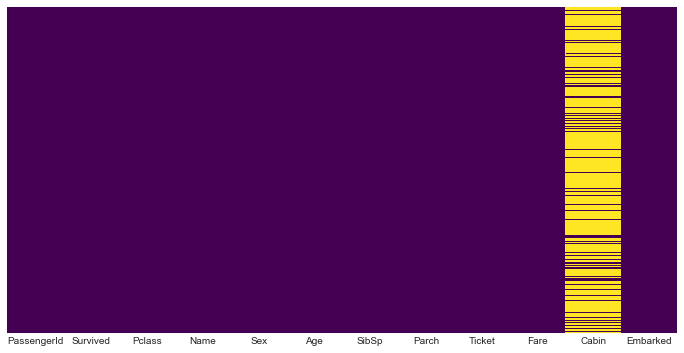

In [45]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we drop the column 'Cabin' and also the rows that have no value in the column 'Embarked'.

In [46]:
df_train.drop('Cabin',axis=1,inplace=True)
df_train.dropna(inplace=True)

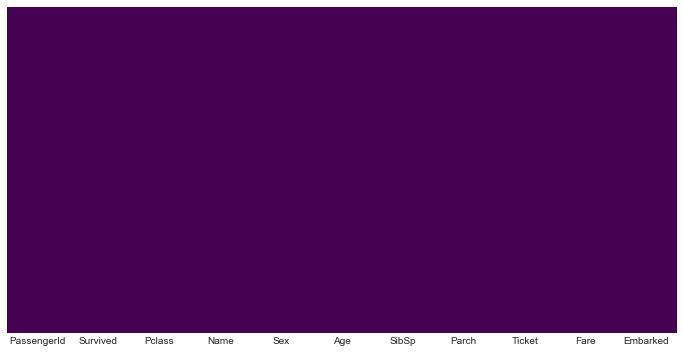

In [47]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Further adjustments for statistical learning algorithms

To be able to use statistical learning methods, without NLP techniques we need to adjust the columns 'Sex' and 'Embarked'. This is necessary because every ML algorithm only works with numbers. This means it is necesarry to convert categorical values like 'male' and 'female' for the 'Sex' column to numbers.
Pandas provides us with the 'get_dummies' method to convert categorical values to numbers.

Furthermore we need to get rid of the 'Names' column, because it does not provide us with any valueable
information for ML tasks.

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [49]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)

The 'drop_first' argument is used because a dummy for male with 0 or 1 implies that the female column need to have the other value. The resulting columns 'male' and 'femnale' are perfect predictors of each other. This is potential bad for ML algorithms so we drop one to avoid this potential side effect. The same priciple applies if dummies are created for non binary categorical values.

In [50]:
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_train = pd.concat([df_train,sex,embark],axis=1)

In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Save the prepared data for ML

This way we don't have to repeat this process ever time we want to run the ML script

In [52]:
df_train.to_csv(path_or_buf="prepared_train.csv", index=False)